### Name - Aakash Jain.
### Roll No. - 222010019.
### Subject - Deep Learning Lab.
### Lab No. 5: Construct a simple Artificial Neural Network (ANN) for the XOR logic function. The model should have one or more hidden layers, and you should train the model using the Backpropagation algorithm. Test the trained model's performance. You need to upload a Jupyter Notebook and a PDF of the code along with the output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys

### Training Data

The XOR logic gate returns true when the number of inputs given is odd and false when they're even. Here is the simple training dataset.

In [2]:
# The training data.
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])

# The labels for the training data.
y = np.array([
    [1],
    [1],
    [0],
    [0]
])

In [3]:
X

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [4]:
y

array([[1],
       [1],
       [0],
       [0]])

#### Layers.

In [5]:
num_i_units = 2 # Number of Input units
num_h_units = 2 # Number of Hidden units
num_o_units = 1 # Number of Output units

#### Parameters.

In [6]:
# The learning rate for Gradient Descent.
learning_rate = 0.01

# The parameter to help with overfitting.
reg_param = 0

# Maximum iterations for Gradient Descent.
max_iter = 750

# Number of training examples
m = 4

#### Weights and Biases.

In [7]:
np.random.seed(1)
W1 = np.random.normal(0, 1, (num_h_units, num_i_units)) # 2x2
W2 = np.random.normal(0, 1, (num_o_units, num_h_units)) # 1x2

B1 = np.random.random((num_h_units, 1)) # 2x1
B2 = np.random.random((num_o_units, 1)) # 1x1

In [8]:
W1

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]])

In [9]:
W2

array([[ 0.86540763, -2.3015387 ]])

In [10]:
B1

array([[0.41919451],
       [0.6852195 ]])

In [11]:
B2

array([[0.20445225]])

#### Sigmoid Function.

Maps any input value to 0 to 1.

In [12]:
def sigmoid(z, derv=False):
    if derv: return z * (1 - z)
    return 1 / (1 + np.exp(-z))

#### Forward Propogation.

In [13]:
def forward(x, predict=False):
    a1 = x.reshape(x.shape[0], 1) # Getting the training example as a column vector.

    z2 = W1.dot(a1) + B1 # 2x2 * 2x1 + 2x1 = 2x1
    a2 = sigmoid(z2) # 2x1

    z3 = W2.dot(a2) + B2 # 1x2 * 2x1 + 1x1 = 1x1
    a3 = sigmoid(z3)

    if predict: return a3
    return (a1, a2, a3)

#### Gradients for the Weights and Biases.

In [14]:
dW1 = 0 # Gradient for W1
dW2 = 0 # Gradient for W2

dB1 = 0 # Gradient for B1
dB2 = 0 # Gradient for B2

cost = np.zeros((max_iter, 1)) # Column vector to record the cost of the NN after each Gradient Descent iteration.

#### Training Using Forward and Backpropagation.

In [15]:
def train(_W1, _W2, _B1, _B2): # The arguments are to bypass UnboundLocalError error
    for i in range(max_iter):
        c = 0
        
        dW1 = 0
        dW2 = 0

        dB1 = 0
        dB2 = 0
        
        for j in range(m):
            sys.stdout.write("\rIteration: {} and {}".format(i + 1, j + 1))

            # Forward Propogation.
            a0 = X[j].reshape(X[j].shape[0], 1) # 2x1

            z1 = _W1.dot(a0) + _B1 # 2x2 * 2x1 + 2x1 = 2x1
            a1 = sigmoid(z1) # 2x1

            z2 = _W2.dot(a1) + _B2 # 1x2 * 2x1 + 1x1 = 1x1
            a2 = sigmoid(z2) # 1x1

            # Back propogation.
            dz2 = a2 - y[j] # 1x1
            dW2 += dz2 * a1.T # 1x1 .* 1x2 = 1x2

            dz1 = np.multiply((_W2.T * dz2), sigmoid(a1, derv=True)) # (2x1 * 1x1) .* 2x1 = 2x1
            dW1 += dz1.dot(a0.T) # 2x1 * 1x2 = 2x2

            dB1 += dz1 # 2x1
            dB2 += dz2 # 1x1

            c = c + (-(y[j] * np.log(a2)) - ((1 - y[j]) * np.log(1 - a2)))
            sys.stdout.flush() # Updating the text.
        
        _W1 = _W1 - learning_rate * (dW1 / m) + ( (reg_param / m) * _W1)
        _W2 = _W2 - learning_rate * (dW2 / m) + ( (reg_param / m) * _W2)

        _B1 = _B1 - learning_rate * (dB1 / m)
        _B2 = _B2 - learning_rate * (dB2 / m)
        cost[i] = (c / m) + ( 
            (reg_param / (2 * m)) * 
            (
                np.sum(np.power(_W1, 2)) + 
                np.sum(np.power(_W2, 2))
            )
        )
    return (_W1, _W2, _B1, _B2)

#### Testing.

In [16]:
W1, W2, B1, B2 = train(W1, W2, B1, B2)

Iteration: 750 and 4

In [17]:
W1

array([[ 1.55583692, -0.55164792],
       [-0.58055922, -1.10774591]])

In [18]:
W2

array([[ 0.83176938, -2.17261274]])

In [19]:
B1

array([[0.42514446],
       [0.46696926]])

In [20]:
B2

array([[0.32986195]])

#### Plotting the model.

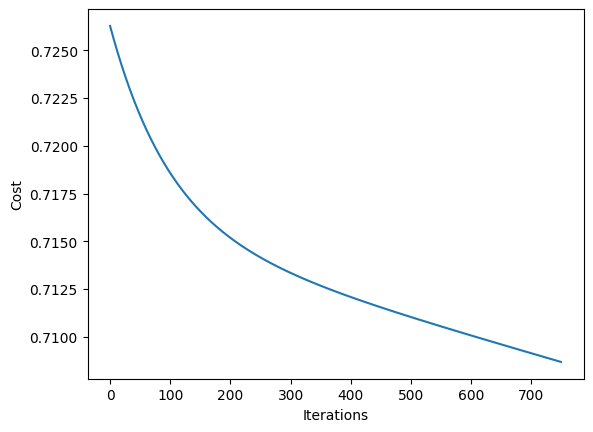

In [21]:
# Assigning the axes to the different elements.
plt.plot(range(max_iter), cost)

# Labelling the x axis as the iterations axis.
plt.xlabel("Iterations")

# Labelling the y axis as the cost axis.
plt.ylabel("Cost")

# Showing the plot.
plt.show()